In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def pct_error(exact, approx):
    return abs((approx - exact) / exact) * 100

In [5]:
adult = pd.read_csv("adult_with_pii.csv")
adult.head()

,Name,DOB,SSN,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0
1,Brandise Tripony,6/7/1988,150-19-2766,61523,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,0,0
2,Brenn McNeely,8/6/1991,725-59-9860,95668,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,32,0,0
3,Dorry Poter,4/6/2009,659-57-4974,25503,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,14,0,0
4,Dick Honnan,9/16/1951,220-93-3811,75387,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,72,0,0


In [6]:
def random_response(response, target):
    Truth_resp = response == target

    if np.random.randint(0 ,2) == 0:
        return Truth_resp
    else:
        # == 0 makes transforms into bool
        return np.random.randint(0, 2) == 0 

In [7]:
Sales_responses = [random_response(r, 'Sales') for r in adult['Occupation']]
d1 = pd.Series(Sales_responses).value_counts()

In [8]:
d2 = pd.Series(adult['Occupation'] == 'Sales').value_counts()

In [9]:
true_yesses = d2.iloc[1,]
print("True Salesman count: ",true_yesses)
rand_yesses = d1.iloc[1,]
print("Salesman count using the Random Response algorithm: ",rand_yesses, "salesmen")

print("Erro:", round(pct_error(true_yesses, rand_yesses), 2), "%\n")

#assuming, due to the fact that the chance of randomly saying yes is 0.25
#its assumed that a quarter of the yesses must be fake 
fake_yesses = d1.sum()/4

#which we subtract on the pot processing
Post_true_yesses = rand_yesses - fake_yesses
#Due to the definition of the function itself, hlaf of the reponders answer truthfully and the other
#is random, due to that, we assume that the group split sin half, so we take the asnwers that are truth and 
#assume that there's rouglthy the same ammount in the random group
Final_Post_result = Post_true_yesses*2

responses = d1.sum()
dPost = [responses - Final_Post_result,Final_Post_result]

print("After post processing, we reach to a final count of ", Final_Post_result, "salesmen")
print("Erro:", round(pct_error(true_yesses, Final_Post_result), 2), "%")

True Salesman count:  3650
Salesman count using the Random Response algorithm:  9982 salesmen
Erro: 173.48 %

After post processing, we reach to a final count of  3682.5 salesmen
Erro: 0.89 %


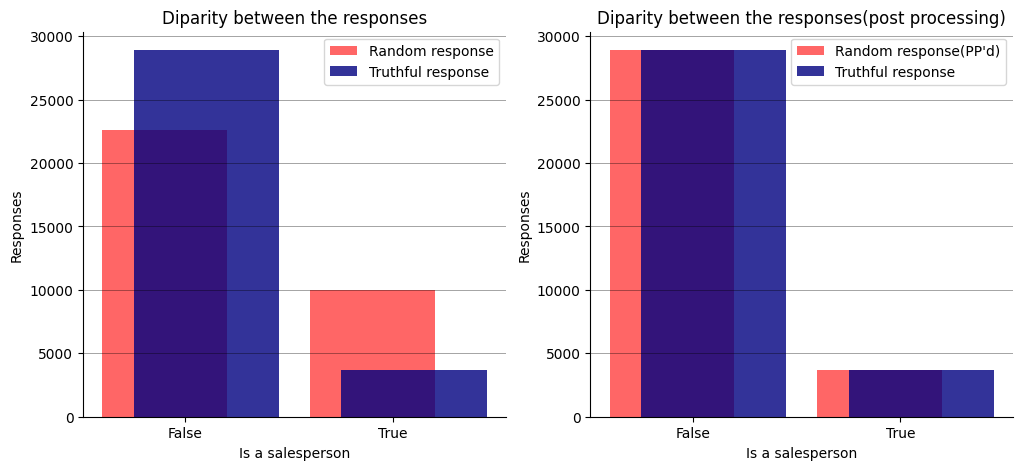

In [19]:
fig = plt.figure(figsize=(12, 5), facecolor='white')

plt.subplot(1, 2, 1)

plt.bar([0, 1], d1, alpha=0.6, label='Random response', align='center', color = 'red', width = 0.6)
plt.bar([0.2, 1.2], d2, alpha=0.8, label='Truthful response', align='center', color = 'navy', width = 0.7)

plt.xlabel('Is a salesperson')
plt.ylabel('Responses')
plt.title('Diparity between the responses')
plt.xticks([0.1, 1.1], ['False', 'True'])
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5, color='black')

#second subploty
plt.subplot(1, 2, 2)

plt.bar([0, 1], dPost, alpha=0.6, label='Random response(PP\'d)', align='center', color = 'red', width = 0.6)
plt.bar([0.2, 1.2], d2, alpha=0.8, label='Truthful response', align='center', color = 'navy', width = 0.7)

plt.xlabel('Is a salesperson')
plt.ylabel('Responses')
plt.title('Diparity between the responses(post processing)')
plt.xticks([0.1, 1.1], ['False', 'True'])
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'y')
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.5, color='black')

plt.savefig('histResponseSales.png', bbox_inches='tight', dpi=300)

plt.show()